In [18]:
from basicsr.data.realesrgan_dataset import RealESRGANDataset
import matplotlib.pyplot as plt
import yaml
import torch

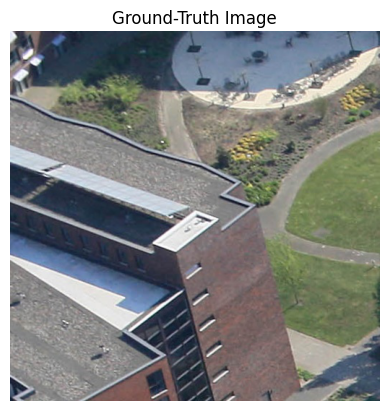

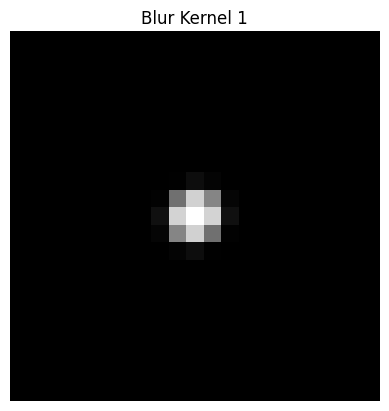

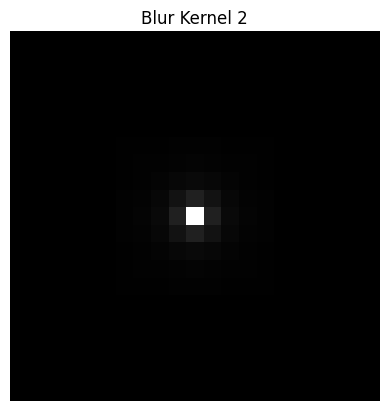

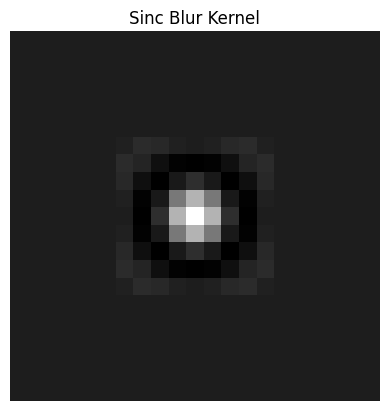

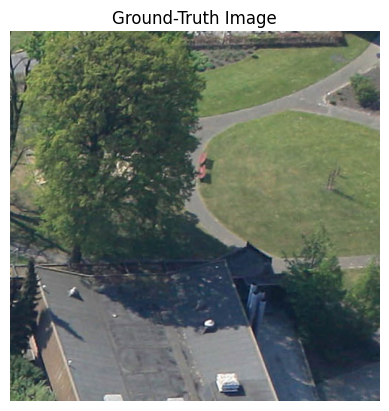

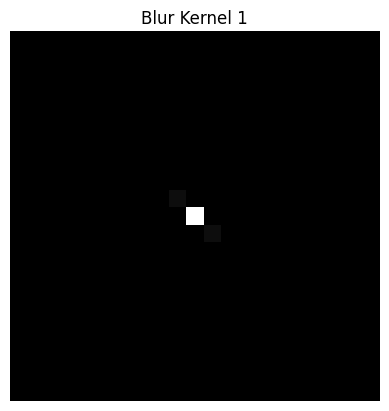

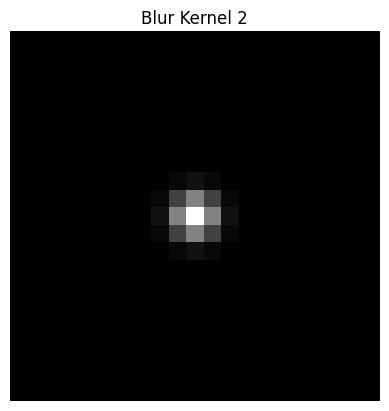

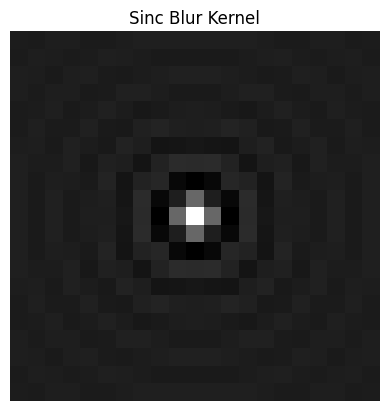

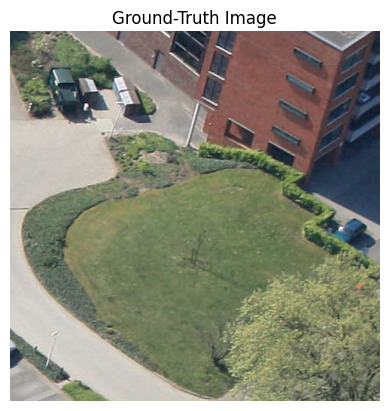

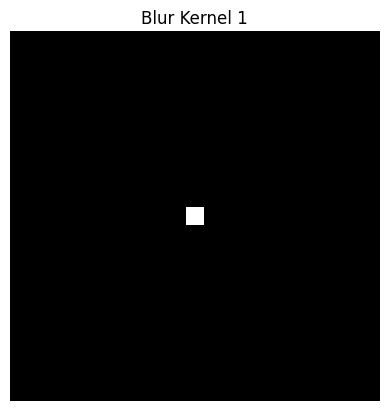

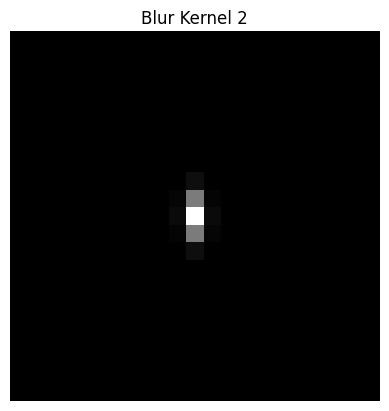

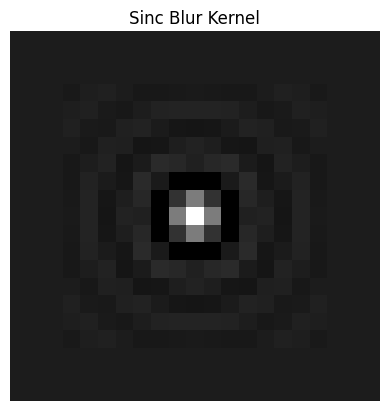

In [15]:
opt = {
    'gt_path': 'E:dataset/ITC_512/',
    'crop_size': 512,
    'io_backend': {
        'type': 'disk'
    },
    'blur_kernel_size': 21,
    'kernel_list': ['iso', 'aniso', 'generalized_iso', 'generalized_aniso', 'plateau_iso', 'plateau_aniso'],
    'kernel_prob': [0.45, 0.25, 0.12, 0.03, 0.12, 0.03],
    'sinc_prob': 0.1,
    'blur_sigma': [0.2, 1.5],
    'betag_range': [0.5, 2.0],
    'betap_range': [1, 1.5],
    'blur_kernel_size2': 11,
    'kernel_list2': ['iso', 'aniso', 'generalized_iso', 'generalized_aniso', 'plateau_iso', 'plateau_aniso'],
    'kernel_prob2': [0.45, 0.25, 0.12, 0.03, 0.12, 0.03],
    'sinc_prob2': 0.1,
    'blur_sigma2': [0.2, 1.0],
    'betag_range2': [0.5, 2.0],
    'betap_range2': [1, 1.5],
    'final_sinc_prob': 0.8,
    'gt_size': 512,
    'use_hflip': True,
    'use_rot': False
}


dataset = RealESRGANDataset(opt)


for i in range(3):
    data = dataset[i]

    # 转换图像数组的形状
    gt_channel = data['gt'].permute(1, 2, 0)

    # 可视化输出 Ground-Truth 图像
    plt.figure()
    plt.imshow(gt_channel)
    plt.title('Ground-Truth Image')
    plt.axis('off')
    plt.show()

    # 可视化输出第一个模糊核
    plt.figure()
    plt.imshow(data['kernel1'], cmap='gray')
    plt.title('Blur Kernel 1')
    plt.axis('off')
    plt.show()

    # 可视化输出第二个模糊核
    plt.figure()
    plt.imshow(data['kernel2'], cmap='gray')
    plt.title('Blur Kernel 2')
    plt.axis('off')
    plt.show()

    # 可视化输出 Sinc 模糊核
    plt.figure()
    plt.imshow(data['sinc_kernel'], cmap='gray')
    plt.title('Sinc Blur Kernel')
    plt.axis('off')
    plt.show()


In [21]:
for i in range(3):
    data = dataset[i]
    
    # 转换图像数组的形状
    gt_channel = data['gt'].permute(1, 2, 0)
    
    # 生成模糊核处理后的图像
    gt_blurred = torch.nn.functional.conv2d(data['gt'].unsqueeze(0), data['kernel1'].unsqueeze(0).unsqueeze(0), padding=data['kernel1'].shape[0] // 2)
    
    # 添加模糊处理后的图像到返回的字典中
    data['gt_blurred'] = gt_blurred.squeeze(0)
    
    # 转换模糊处理后的图像数组的形状
    gt_blurred_channel = data['gt_blurred'].permute(1, 2, 0)
    
    # 可视化输出 Ground-Truth 图像
    plt.figure()
    plt.imshow(gt_channel)
    plt.title('Ground-Truth Image')
    plt.axis('off')
    plt.show()

    # 可视化输出经过模糊核处理后的图像
    plt.figure()
    plt.imshow(gt_blurred_channel)
    plt.title('Blurred Ground-Truth Image')
    plt.axis('off')
    plt.show()

RuntimeError: Given groups=1, weight of size [1, 1, 21, 21], expected input[1, 3, 512, 512] to have 1 channels, but got 3 channels instead